In [9]:
%matplotlib inline  
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import tensorflow as tf                                                                              


x_data= np.random.rand(50,2).astype(float)
y_data = np.expand_dims(((x_data[:,1] > 0.5)*( x_data[:,0] > 0.5)).astype(int),axis=1)



In [10]:
def plot_data(X1,X2,Y):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.scatter(X1[Y>0], X2[Y>0], np.ones(X1[Y>0].shape) ,c='b',marker='o')
    surf = ax.scatter(X1[Y<=0], X2[Y<=0], np.zeros(X1[Y<=0].shape) ,c='r',marker='^')
    plt.show()

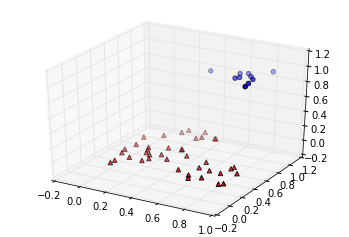

[[ 0.39390445  0.55129671]
 [ 0.3623195   0.99768439]
 [ 0.24237638  0.97462941]
 [ 0.16272742  0.20234602]
 [ 0.93233301  0.30931207]
 [ 0.22363974  0.89936571]
 [ 0.8782906   0.97636709]
 [ 0.85185878  0.63040603]
 [ 0.28891509  0.25238074]
 [ 0.83764441  0.73213086]
 [ 0.83607508  0.25202803]
 [ 0.86355381  0.55327041]
 [ 0.74999552  0.25808057]
 [ 0.0554805   0.33843813]
 [ 0.07356044  0.25872138]
 [ 0.32307626  0.3782385 ]
 [ 0.70803581  0.80934263]
 [ 0.66867982  0.09964996]
 [ 0.17635868  0.46779553]
 [ 0.75665713  0.83929228]
 [ 0.19663348  0.41546124]
 [ 0.69539131  0.04073651]
 [ 0.39927618  0.31069353]
 [ 0.7671193   0.0993796 ]
 [ 0.66460249  0.27426536]
 [ 0.04398619  0.65203697]
 [ 0.48444505  0.90254382]
 [ 0.86135622  0.41640701]
 [ 0.10594316  0.02746893]
 [ 0.39221327  0.87843331]
 [ 0.65526699  0.40519282]
 [ 0.94223297  0.07440114]
 [ 0.2992043   0.53498781]
 [ 0.48368322  0.45106957]
 [ 0.79926868  0.7861156 ]
 [ 0.36790313  0.83567759]
 [ 0.14444605  0.76908119]
 

In [12]:
plot_data(x_data[:,0], x_data[:,1], y_data.T[0,:])
print x_data
print y_data

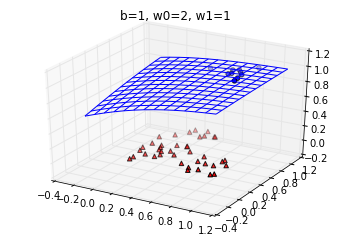

In [13]:
def plot_logistic(b,w0,w1,mx1,mx2,my):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X1, X2 = np.mgrid[-0.2:1.2:0.1, -0.2:1.2:0.1]
    X0 = np.ones(X1.shape)
    Z=np.divide(1,1+np.exp(-1*(np.multiply(b,X0)+np.multiply(w0,X1)+np.multiply(w1,X2)) ))
    surf = ax.plot_wireframe(X1, X2, Z, cstride=1, rstride=1)
    ax.set_title(("b=%s, w0=%s, w1=%s")%(b,w0,w1))
    surf = ax.scatter(mx1[my>0], mx2[my>0], np.ones(mx1[my>0].shape) ,c='b',marker='o')
    surf = ax.scatter(mx1[my<=0], mx2[my<=0], np.zeros(mx1[my<=0].shape) ,c='r',marker='^')
    plt.show()
plot_logistic(1,2, 1,x_data[:,0], x_data[:,1], y_data.T[0,:])

step:0,
w:[[-0.04120922]
 [-0.99679238]],
b:[[-1.31894112]],
error:28.7067


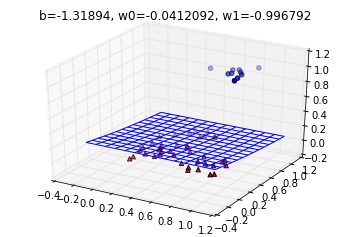

step:50,
w:[[ 4.33203411]
 [ 3.78192258]],
b:[[-5.94306612]],
error:12.1548


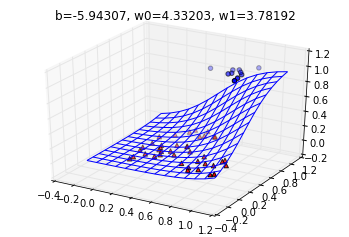

step:100,
w:[[ 6.29605436]
 [ 5.29135656]],
b:[[-8.1996994]],
error:9.87653


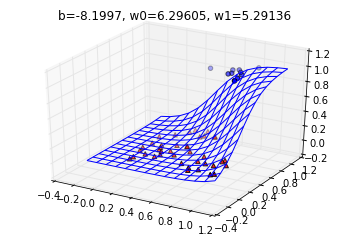

step:150,
w:[[ 7.64321756]
 [ 6.30337524]],
b:[[-9.76205349]],
error:8.81616


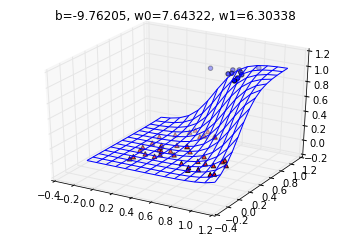

step:200,
w:[[ 8.68453789]
 [ 7.09440374]],
b:[[-10.98603153]],
error:8.17349


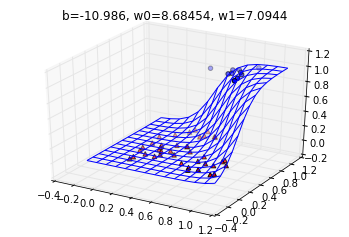

step:250,
w:[[ 9.54030514]
 [ 7.75307512]],
b:[[-12.00274944]],
error:7.73322


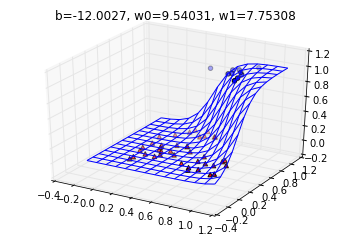

step:300,
w:[[ 10.2700386 ]
 [  8.32130814]],
b:[[-12.87702942]],
error:7.40919


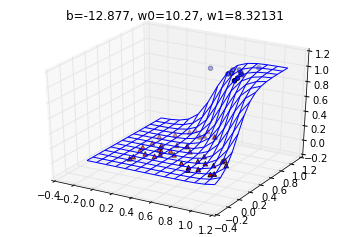

step:350,
w:[[ 10.90785408]
 [  8.82291031]],
b:[[-13.64631557]],
error:7.15915


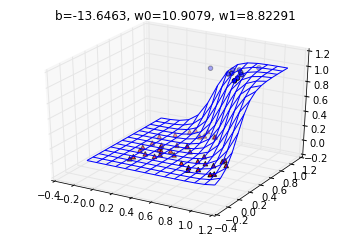

step:400,
w:[[ 11.47528744]
 [  9.27292633]],
b:[[-14.334445]],
error:6.95957


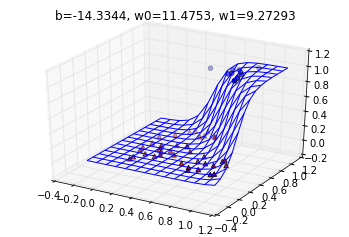

step:450,
w:[[ 11.98688126]
 [  9.68157768]],
b:[[-14.95766163]],
error:6.79618


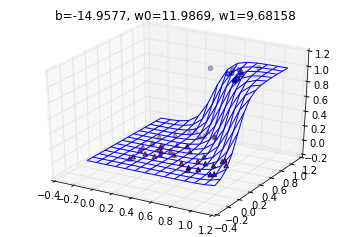

In [14]:

x_ = tf.placeholder(tf.float32,[None,2], name="x_")
y_ = tf.placeholder(tf.float32,[None,1], name="y_")
w = tf.Variable(tf.random_uniform([2,1], -1.0, 1.0), name="w")
b = tf.Variable(tf.zeros([1,1]), name="b")
y = tf.nn.sigmoid(tf.matmul(x_,w)+b)

cross_entropy = -tf.reduce_sum(y_*tf.log(y) + (1-y_) * tf.log(1-y))

optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(cross_entropy)

init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)
for step in xrange(500):
    sess.run(train,feed_dict={x_:x_data,y_:y_data})
    if step % 50 == 0:
        wi = sess.run(w)
        bi = sess.run(b)
        ce = sess.run(cross_entropy,feed_dict={x_:x_data,y_:y_data})
        print "step:%s,\nw:%s,\nb:%s,\nerror:%s" %(step,wi, bi, ce)
        plot_logistic(bi[0,0],wi[0,0],wi[1,0],x_data[:,0], x_data[:,1], y_data.T[0,:])